Este es el inciso a) utilizando igraph en R (incluye infomap) 

In [13]:
#### Modulos
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
import os
import numpy as np
import rpy2.robjects as robjects

In [2]:
Gdolphins = nx.read_gml("dolphins.gml")

In [3]:
#### Este es el algoritmo que utiliza packetes de redes en R 
def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name, v_names){
            require("igraph")     
            
            G <- read.graph(file, "gml")
            V(G)$name <- as.character(unlist(v_names))
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- fastgreedy.community(G)
                #c <- cluster_fast_greedy(G, merges = TRUE, modularity = TRUE, membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- edge.betweenness.community(G)
                #c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- multilevel.community(G)
                #c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                #c <- cluster_infomap(G)
                c <- infomap.community(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(list(membership(c), as.character(V(G)$name)))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name, list(dict(nxG.nodes(data=True)).keys()))
    os.remove(gml_file_name)
    return {name: int(label) for name, label in zip(labels[1],labels[0])}



/home/carlos/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: igraph

  warnings.warn(x, RRuntimeWarning)
/home/carlos/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘igraph’


  warnings.warn(x, RRuntimeWarning)
/home/carlos/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    decompose, spectrum


  warnings.warn(x, RRuntimeWarning)
/home/carlos/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:base’:

    union


  warnings.warn(x, RRuntimeWarning)


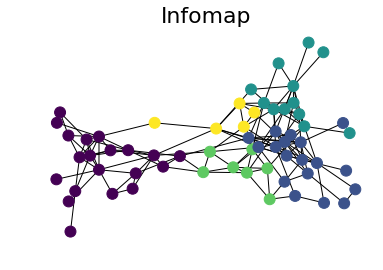

In [4]:
##### infomap
labels_infomap = community(Gdolphins, "infomap")
for name,label in labels_infomap.items():
    Gdolphins.nodes()[name]["color"] = label
plt.title('Infomap', fontsize=22)
nx.draw(Gdolphins, node_color=list(nx.get_node_attributes(Gdolphins, "color").values()), node_size= 120)

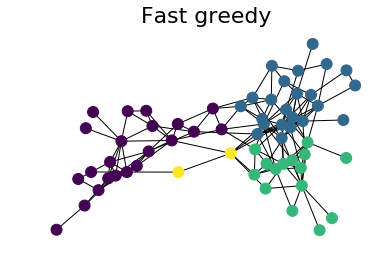

In [5]:
#### fast greedy
labels_fast_greedy = community(Gdolphins, "fast_greedy")
for name,label in labels_fast_greedy.items():
    Gdolphins.nodes()[name]["color"] = label
plt.title('Fast greedy', fontsize=22)
nx.draw(Gdolphins, node_color=list(nx.get_node_attributes(Gdolphins, "color").values()), node_size= 120)

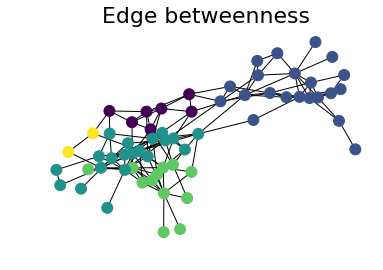

In [10]:
##### edge betweenness
labels_edge_betweenness = community(Gdolphins, "edge_betweenness")
for name,label in labels_edge_betweenness.items():
    Gdolphins.nodes()[name]["color"] = label
plt.title('Edge betweenness', fontsize=22)
nx.draw(Gdolphins, node_color=list(nx.get_node_attributes(Gdolphins, "color").values()), node_size= 120)

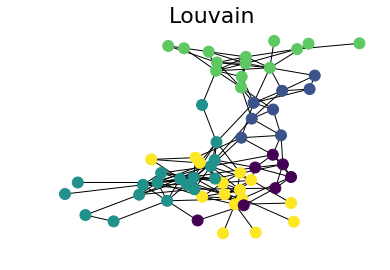

In [12]:
#### louvain
labels_louvain = community(Gdolphins, "louvain")
for name,label in labels_louvain.items():
    Gdolphins.nodes()[name]["color"] = label
plt.title('Louvain', fontsize=22)
nx.draw(Gdolphins, node_color=list(nx.get_node_attributes(Gdolphins, "color").values()), node_size= 120)